In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

# 1. 데이터 가져오기

In [3]:
df = pd.read_csv('C:/Users/Dain/Python_Jupyter/데이터마이닝_홍정식/heart_failure.csv')
df1 =  pd.read_csv('C:/Users/Dain/Python_Jupyter/데이터마이닝_홍정식/heart_failure.csv')
df2 = pd.read_csv('C:/Users/Dain/Python_Jupyter/데이터마이닝_홍정식/heart_failure.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 2. 전처리

### 2-1. 이상치 제거하기

In [4]:
# 이상치 제거하기
df = df[df.RestingBP > 50]
df = df[df.Cholesterol != 0]

df1 = df[df.RestingBP > 50]
df1 = df[df.Cholesterol != 0]

df2 = df[df.RestingBP > 50]
df2 = df[df.Cholesterol != 0]

In [5]:
# 이상치 제거한거 확인 (총 918개 -> 746개)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### 2-2. 인코딩

In [6]:
from sklearn import preprocessing

* sex : M = 1, F = 0
* chestpaintype : ASY = 0, ATA = 1, NAP = 2, TA = 3
* restingECG : LVH = 0, Normal = 1, ST = 2
* exerciseAngina : No = 0, Yes = 1
* ST_Slope : Down = 0, Flat = 1, Up = 2

In [7]:
# 라벨 인코딩 (df1)
le = preprocessing.LabelEncoder()
df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

In [8]:
# 원핫인코딩 (df2)
df2['FastingBS'] = df2['FastingBS'].astype('category')

In [9]:
num_col = df.drop(columns='HeartDisease').select_dtypes(include=['int']).columns.tolist()
cat_col = df2.drop(columns='HeartDisease').select_dtypes(include=['object', 'category']).columns.tolist()
df2 = pd.get_dummies(df2, columns=cat_col)

In [10]:
df2

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
914,68,144,193,141,3.4,1,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
915,57,130,131,115,1.2,1,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0
916,57,130,236,174,0.0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0


# 3. 모델 비교
* CRI & Stable DT
* Random Forest
* Gradient Boost
* KNN

### 3-0. CRI

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [12]:
from modules.stableCRI import stable_concise_rule_induction # file 제공

dataset = df.copy()
target_name = 'HeartDisease' # target name을 꼭 입력해주시길 바랍니다.
colnm = dataset.columns
X = dataset.loc[:,colnm [colnm != target_name]]
y = dataset.loc[:, target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Concatenating X,y -> training dataset([X_train,y_train]), test dataset([X_test,y_test]) 
train_idx, test_idx = X_train.index, X_test.index
df_train, df_test = dataset.loc[train_idx,:], dataset.loc[test_idx,:]

In [38]:
# fitting
min_sample_ratio = 0.03
min_samples = round(min_sample_ratio * len(df_train))
max_depth = 100 # 처음에는 2 또는 3으로 설정해서 돌려보고, 소요시간을 체크해보시기 바랍니다.

cri = stable_concise_rule_induction(min_samples = min_samples, max_depth = max_depth)
cri.fit(data = df_train, target_name = target_name, iter_num = 20, rule_rate = 0.9) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [39]:
# predictive performance
# f1 : macro-averaging for multiclass
pred_y, acc, f1 = cri.predict(df_test)
acc,f1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(0.8667, 0.8666)

In [40]:
# confusion matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[37 28]
 [42 43]]


In [41]:
# rules
cri.export_text()

IF ['Oldpeak >= 2.45'] THEN HeartDisease = 1   (homogeneity = 0.9464 , coverage = 0.094 )
IF ['MaxHR >= 177.5'] THEN HeartDisease = 0   (homogeneity = 0.9189 , coverage = 0.0621 )
IF ['ChestPainType == ATA'] THEN HeartDisease = 0   (homogeneity = 0.8939 , coverage = 0.2215 )
IF ['Oldpeak >= 1.85'] THEN HeartDisease = 1   (homogeneity = 0.8525 , coverage = 0.2047 )
IF ['Oldpeak < 2.45', 'ST_Slope != Flat', 'ChestPainType == NAP'] THEN HeartDisease = 0   (homogeneity = 0.987 , coverage = 0.1292 )
IF ['ExerciseAngina == Y'] THEN HeartDisease = 1   (homogeneity = 0.8217 , coverage = 0.3859 )
IF ['Oldpeak < 2.45', 'Sex != M'] THEN HeartDisease = 0   (homogeneity = 0.7923 , coverage = 0.2181 )


In [42]:
cri.df_concise_rule

,0,1,2,3,4,5,6
Rule,"Oldpeak < 2.45, ST_Slope != Flat, ChestPainTyp...",Oldpeak >= 2.45,MaxHR >= 177.5,ChestPainType == ATA,Oldpeak >= 1.85,ExerciseAngina == Y,"Oldpeak < 2.45, Sex != M"
pred_y,0,1,0,0,1,1,0
Homogeneity,0.987,0.9464,0.9189,0.8939,0.8525,0.8217,0.7923
Coverage,0.1292,0.094,0.0621,0.2215,0.2047,0.3859,0.2181
# of condition,3.0,1.0,1.0,1.0,1.0,1.0,2.0


In [18]:
# dataset not included in rules
cri.others_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
865,54,M,ASY,120,188,0,Normal,113,N,1.4,Flat,1
18,60,M,ASY,100,248,0,Normal,125,N,1.0,Flat,1
773,56,M,TA,120,193,0,LVH,162,N,1.9,Flat,0
719,63,M,ASY,130,254,0,LVH,147,N,1.4,Flat,1
757,50,M,NAP,140,233,0,Normal,163,N,0.6,Flat,1
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
625,59,M,ASY,135,234,0,Normal,161,N,0.5,Flat,0
587,37,M,NAP,118,240,0,LVH,165,N,1.0,Flat,0
849,62,M,NAP,130,231,0,Normal,146,N,1.8,Flat,0
520,64,M,ASY,130,223,0,ST,128,N,0.5,Flat,0


## * Rule Relation 독립/종속
### 1. (y = 1) rule
* r1 = df[df['Oldpeak'] >= 2.45]
* r2 = df[df['ExerciseAngina'] == 'Y']


### 2. (y = 0) rule
* r1 = df[(df['Oldpeak'] < 2.45) & (df['ST_Slope'] != 'Flat') & (df[''ChestPainType] == 'NAP')]
* r2 = df[df['MaxHR'] >= 177.5]
* r3 = df[df['ChestPainType'] == 'ATA']
* r4 = df[(df['Oldpeak'] < 2.45) & (df['Sex'] != 'M')]

In [18]:
from scipy.stats import chi2_contingency

In [43]:
# y = 1
r1 = df[df['Oldpeak'] >= 2.45]
r2 = df[df['ExerciseAngina'] == 'Y']

In [44]:
# R1 & R2
x11 = r1[r1['ExerciseAngina'] == 'Y'].shape[0]
x10 = r1[r1['ExerciseAngina'] != 'Y'].shape[0]
x01 = r2[r2['Oldpeak'] < 2.45].shape[0]
x00 = df[(df['Oldpeak'] < 2.45) & (df['ExerciseAngina'] != 'Y')].shape[0]

obs = pd.DataFrame({'r2(O)': [x11, x01], 'r2(X)': [x10, x00]})
obs.index = ['r1(O)', 'r1(X)']

chiresult = chi2_contingency(obs, correction = False)
print('Chi square : {}'.format(chiresult[0]))
print('P-Value : {}'.format(chiresult[1]))

Chi square : 44.60901327253723
P-Value : 2.4058157022225023e-11


In [46]:
# y = 0
r1 = df[(df['Oldpeak'] < 2.45) & (df['ST_Slope'] != 'Flat') & (df['ChestPainType'] == 'NAP')]
r2 = df[df['MaxHR'] >= 177.5]
r3 = df[df['ChestPainType'] == 'ATA']
r4 = df[(df['Oldpeak'] < 2.45) & (df['Sex'] != 'M')]

In [49]:
# R1 & R2
x11 = r1[r1['MaxHR'] >= 177.5].shape[0]
x10 = r1[r1['MaxHR'] < 177.5].shape[0]
x01 = r2[(r2['Oldpeak'] >= 2.45) & (r2['ST_Slope'] == 'Flat') & (r2['ChestPainType'] != 'NAP')].shape[0]
x00 = df[(df['MaxHR'] < 177.5) & (df['Oldpeak'] >= 2.45) & (df['ST_Slope'] == 'Flat') & (df['ChestPainType'] != 'NAP')].shape[0]

obs = pd.DataFrame({'r2(O)': [x11, x01], 'r2(X)': [x10, x00]})
obs.index = ['r1(O)', 'r1(X)']

chiresult = chi2_contingency(obs, correction = False)
print('Chi square : {}'.format(chiresult[0]))
print('P-Value : {}'.format(chiresult[1]))

Chi square : 2.9432876205692646
P-Value : 0.08623505109211292


In [50]:
# R1 & R3
x11 = r1[r1['ChestPainType'] == 'ATA'].shape[0]
x10 = r1[r1['ChestPainType'] != 'ATA'].shape[0]
x01 = r3[(r3['Oldpeak'] >= 2.45) & (r3['ST_Slope'] == 'Flat') & (r3['ChestPainType'] != 'NAP')].shape[0]
x00 = df[(df['Oldpeak'] >= 2.45) & (df['ST_Slope'] == 'Flat') & (df['ChestPainType'] != 'NAP') & (df['ChestPainType'] != 'ATA')].shape[0]

obs = pd.DataFrame({'r3(O)': [x11, x01], 'r3(X)': [x10, x00]})
obs.index = ['r1(O)', 'r1(X)']

chiresult = chi2_contingency(obs, correction = False)
print('Chi square : {}'.format(chiresult[0]))
print('P-Value : {}'.format(chiresult[1]))

Chi square : 4.7171367309912595
P-Value : 0.029863430171822167


In [51]:
# R1 & R4
x11 = r1[(r1['Oldpeak'] < 2.45) & (r1['Sex'] != 'M')].shape[0]
x10 = r1[(r1['Oldpeak'] >= 2.45) & (r1['Sex'] == 'M')].shape[0]
x01 = r4[(r4['Oldpeak'] >= 2.45) & (r4['ST_Slope'] == 'Flat') & (r4['ChestPainType'] != 'NAP')].shape[0]
x00 = df[(df['Oldpeak'] >= 2.45) & (df['ST_Slope'] == 'Flat') & (df['ChestPainType'] != 'NAP') & (df['Sex'] == 'M')].shape[0]

obs = pd.DataFrame({'r4(O)': [x11, x01], 'r4(X)': [x10, x00]})
obs.index = ['r1(O)', 'r1(X)']

chiresult = chi2_contingency(obs, correction = False)
print('Chi square : {}'.format(chiresult[0]))
print('P-Value : {}'.format(chiresult[1]))

Chi square : 71.99999999999999
P-Value : 2.1519736712499042e-17


In [52]:
# R2 & R3
x11 = r2[r2['ChestPainType'] == 'ATA'].shape[0]
x10 = r2[r2['ChestPainType'] != 'ATA'].shape[0]
x01 = r3[r3['MaxHR'] < 177.5].shape[0]
x00 = df[(df['MaxHR'] < 177.5) & (df['ChestPainType'] != 'ATA')].shape[0]

obs = pd.DataFrame({'r3(O)': [x11, x01], 'r3(X)': [x10, x00]})
obs.index = ['r2(O)', 'r2(X)']

chiresult = chi2_contingency(obs, correction = False)
print('Chi square : {}'.format(chiresult[0]))
print('P-Value : {}'.format(chiresult[1]))

Chi square : 6.126908104467559
P-Value : 0.013313951016868003


In [53]:
# R2 & R4
x11 = r2[(r2['Oldpeak'] < 2.45) & (r2['Sex'] != 'M')].shape[0]
x10 = r2[(r2['Oldpeak'] >= 2.45) & (r2['Sex'] == 'M')].shape[0]
x01 = r4[r4['MaxHR'] < 177.5].shape[0]
x00 = df[(df['MaxHR'] < 177.5) & (df['Oldpeak'] >= 2.45) & (df['Sex'] == 'M')].shape[0]

obs = pd.DataFrame({'r4(O)': [x11, x01], 'r4(X)': [x10, x00]})
obs.index = ['r2(O)', 'r2(X)']

chiresult = chi2_contingency(obs, correction = False)
print('Chi square : {}'.format(chiresult[0]))
print('P-Value : {}'.format(chiresult[1]))

Chi square : 0.721231986422022
P-Value : 0.3957400924014586


In [54]:
# R3 & R4
x11 = r3[(r3['Oldpeak'] < 2.45) & (r3['Sex'] != 'M')].shape[0]
x10 = r3[(r3['Oldpeak'] >= 2.45) & (r3['Sex'] == 'M')].shape[0]
x01 = r4[r4['ChestPainType'] != 'ATA'].shape[0]
x00 = df[(df['ChestPainType'] != 'ATA') & (df['Oldpeak'] >= 2.45) & (df['Sex'] == 'M')].shape[0]

obs = pd.DataFrame({'r4(O)': [x11, x01], 'r4(X)': [x10, x00]})
obs.index = ['r3(O)', 'r3(X)']

chiresult = chi2_contingency(obs, correction = False)
print('Chi square : {}'.format(chiresult[0]))
print('P-Value : {}'.format(chiresult[1]))

Chi square : 23.862521615917473
P-Value : 1.0346665315119351e-06


### 3-1. Stable DT

In [20]:
from modules.stableDT import stableDecisionTree # file 제공
from modules.stableDT import visualize_tree # file 제공

In [21]:
X = df[['Age', 'Sex',
       'ChestPainType', 'RestingBP',
       'Cholesterol', 'FastingBS', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']].copy()
y = df['HeartDisease'].copy()

In [22]:
# training : test 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1333)

In [23]:
# fitting
min_sample_ratio = 0.03 # 최소 샘플 수로 dataset의 샘플 수의 3%
#max_depth = 4
impurity_measure='entropy'
iter_num=30

clf = stableDecisionTree(
    min_sample = min_sample_ratio*len(X), 
    iter_num = iter_num,
    max_depth = 3,
    impurity_measure = impurity_measure)
clf.fit(X_train,y_train)

In [24]:
# predictive performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

pred_y = clf.predict(X_test)
acc = accuracy_score(y_test,pred_y)
f1 = f1_score(y_test, pred_y)
acc, f1

(0.8866666666666667, 0.9028571428571429)

In [25]:
# confusion matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[54 11]
 [ 6 79]]


In [26]:
# exporting rules to text
clf.export_text()

IF ST_Slope != Up AND ChestPainType != ASY AND Sex != F THEN y = 1
IF ST_Slope != Up AND ChestPainType == ASY AND Sex != F THEN y = 1
IF ST_Slope != Up AND ChestPainType == ASY AND Sex == F THEN y = 1
IF ST_Slope == Up AND ChestPainType == ASY AND ExerciseAngina != N THEN y = 1
IF ST_Slope != Up AND ChestPainType != ASY AND Sex == F THEN y = 0
IF ST_Slope == Up AND ChestPainType != ASY AND Age > 56.0 THEN y = 0
IF ST_Slope == Up AND ChestPainType != ASY AND Age <= 56.0 THEN y = 0
IF ST_Slope == Up AND ChestPainType == ASY AND ExerciseAngina == N THEN y = 0


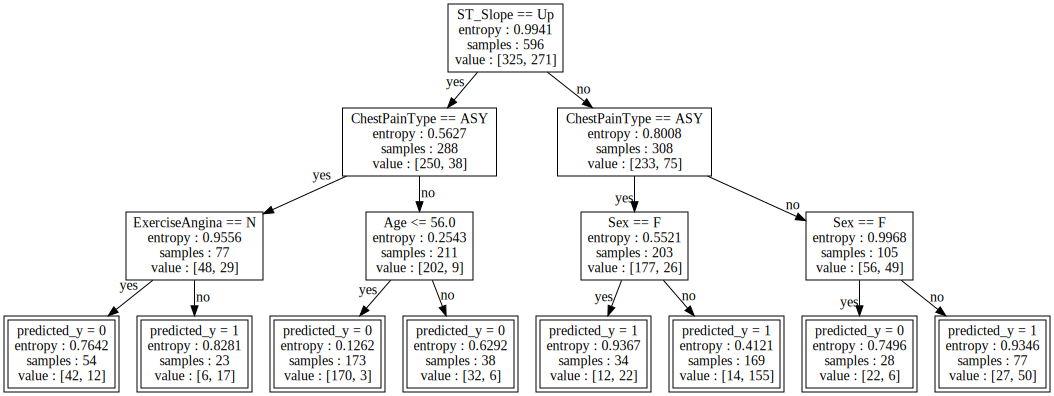

In [27]:
# images
visualize_tree(clf.root)

### * homogeneity & coverage 구하기

In [40]:
# 사전확률
total = 746
p0 = (df.loc[df['HeartDisease'] == 0, ].shape[0])/total
p1 = (df.loc[df['HeartDisease'] == 1, ].shape[0])/total
print(p0, p1)

0.5227882037533512 0.4772117962466488


In [41]:
# y=1
# coverage
r1 = df.loc[(df['ST_Slope'] != 'Up') & (df['ChestPainType'] != 'ASY') & (df['Sex'] != 'F')]
r2 = df.loc[(df['ST_Slope'] != 'Up') & (df['ChestPainType'] == 'ASY') & (df['Sex'] != 'F')]
r3 = df.loc[(df['ST_Slope'] != 'Up') & (df['ChestPainType'] == 'ASY') & (df['Sex'] == 'F')]
r4 = df.loc[(df['ST_Slope'] == 'Up') & (df['ChestPainType'] == 'ASY') & (df['ExerciseAngina'] != 'N')]

c1 = r1.shape[0]/total
c2 = r2.shape[0]/total
c3 = r3.shape[0]/total
c4 = r4.shape[0]/total
c = [c1, c2, c3, c4]

In [42]:
# homo
df_y1 = df[df['HeartDisease'] == 1]
hr1 = df_y1.loc[(df['ST_Slope'] != 'Up') & (df['ChestPainType'] != 'ASY') & (df['Sex'] != 'F')]
hr2 = df_y1.loc[(df['ST_Slope'] != 'Up') & (df['ChestPainType'] == 'ASY') & (df['Sex'] != 'F')]
hr3 = df_y1.loc[(df['ST_Slope'] != 'Up') & (df['ChestPainType'] == 'ASY') & (df['Sex'] == 'F')]
hr4 = df_y1.loc[(df['ST_Slope'] == 'Up') & (df['ChestPainType'] == 'ASY') & (df['ExerciseAngina'] != 'N')]
h1 = hr1.shape[0]/r1.shape[0]
h2 = hr2.shape[0]/r2.shape[0]
h3 = hr3.shape[0]/r3.shape[0]
h4 = hr4.shape[0]/r4.shape[0]
h = [h1, h2, h3, h4]

In [43]:
# WA
wa = []
for i in range(4):
    wa.append(c[i]*(h[i]-p1))

In [44]:
print(c)
print(h)
print(wa)

[0.1260053619302949, 0.30563002680965146, 0.057640750670241284, 0.03753351206434316]
[0.6702127659574468, 0.9254385964912281, 0.6744186046511628, 0.7142857142857143]
[0.024319157041306994, 0.13699156897555506, 0.011367148473718634, 0.008898216762860367]


In [45]:
# y=0
# coverage
r1 = df.loc[(df['ST_Slope'] != 'Up') & (df['ChestPainType'] != 'ASY') & (df['Sex'] == 'F')]
r2 = df.loc[(df['ST_Slope'] == 'Up') & (df['ChestPainType'] != 'ASY') & (df['Age'] > 56)]
r3 = df.loc[(df['ST_Slope'] == 'Up') & (df['ChestPainType'] != 'ASY') & (df['Age'] < 56)]
r4 = df.loc[(df['ST_Slope'] == 'Up') & (df['ChestPainType'] == 'ASY') & (df['ExerciseAngina'] == 'N')]

c1 = r1.shape[0]/total
c2 = r2.shape[0]/total
c3 = r3.shape[0]/total
c4 = r4.shape[0]/total
c = [c1, c2, c3, c4]

In [46]:
# homo
df_y0 = df[df['HeartDisease'] == 0]
hr1 = df_y0.loc[(df['ST_Slope'] != 'Up') & (df['ChestPainType'] != 'ASY') & (df['Sex'] == 'F')]
hr2 = df_y0.loc[(df['ST_Slope'] == 'Up') & (df['ChestPainType'] != 'ASY') & (df['Age'] > 56)]
hr3 = df_y0.loc[(df['ST_Slope'] == 'Up') & (df['ChestPainType'] != 'ASY') & (df['Age'] < 56)]
hr4 = df_y0.loc[(df['ST_Slope'] == 'Up') & (df['ChestPainType'] == 'ASY') & (df['ExerciseAngina'] == 'N')]

h1 = hr1.shape[0]/r1.shape[0]
h2 = hr2.shape[0]/r2.shape[0]
h3 = hr3.shape[0]/r3.shape[0]
h4 = hr4.shape[0]/r4.shape[0]
h = [h1, h2, h3, h4]

In [47]:
# WA
wa = []
for i in range(4):
    wa.append(c[i]*(h[i]-p1))

In [48]:
print(c)
print(h)
print(wa)

[0.04289544235924933, 0.06702412868632708, 0.2587131367292225, 0.09517426273458444]
[0.75, 0.84, 0.9844559585492227, 0.8028169014084507]
[0.01170137067038504, 0.02431556325424606, 0.13123072831688576, 0.03098922582639134]


### 3-1. CART (사용X)
* label encoding 적용한 데이터 사용

In [11]:
# randomly split into a training and test dataset
# from sklearn.model_selection import train_test_split
X = df1.drop(columns='HeartDisease')
y = df1['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# from sklearn.tree import DecisionTreeClassifier

In [38]:
# from sklearn.model_selection import GridSearchCV 
param={"criterion" : ['gini', 'entropy'], 
       "max_depth":[2, 3, 4, 5, 6, None], 
       "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10] } 

method1 = DecisionTreeClassifier() 
gs = GridSearchCV(method1, param_grid=param, cv=3, n_jobs=-1) 

gs.fit(X, y)
result1 = gs.best_estimator_
print("train_score : {} ".format(result1.score(X_train, y_train))) 
print("test_score : {} ".format(result1.score(X_test, y_test))) 
print(gs.best_score_) 
print(gs.best_params_)

train_score : 0.8540268456375839 
test_score : 0.9066666666666666 
0.8176644295302014
{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [42]:
# fitting
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [43]:
# predicted class
pred_y = clf_tree.predict(X_test)
pred_y

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

train accuracy: 0.8557046979865772
test accuracy: 0.8533333333333334


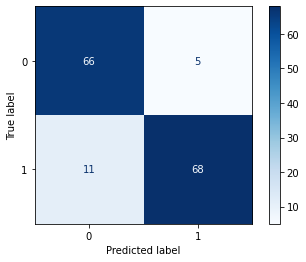

In [77]:
# accuracy score
train_acc = clf_tree.score(X_train,y_train)
test_acc = clf_tree.score(X_test,y_test)
print('train accuracy:', train_acc)
print('test accuracy:', test_acc)
plot_confusion_matrix(gbm, X_test, y_test, cmap = plt.cm.Blues, values_format = 'd')

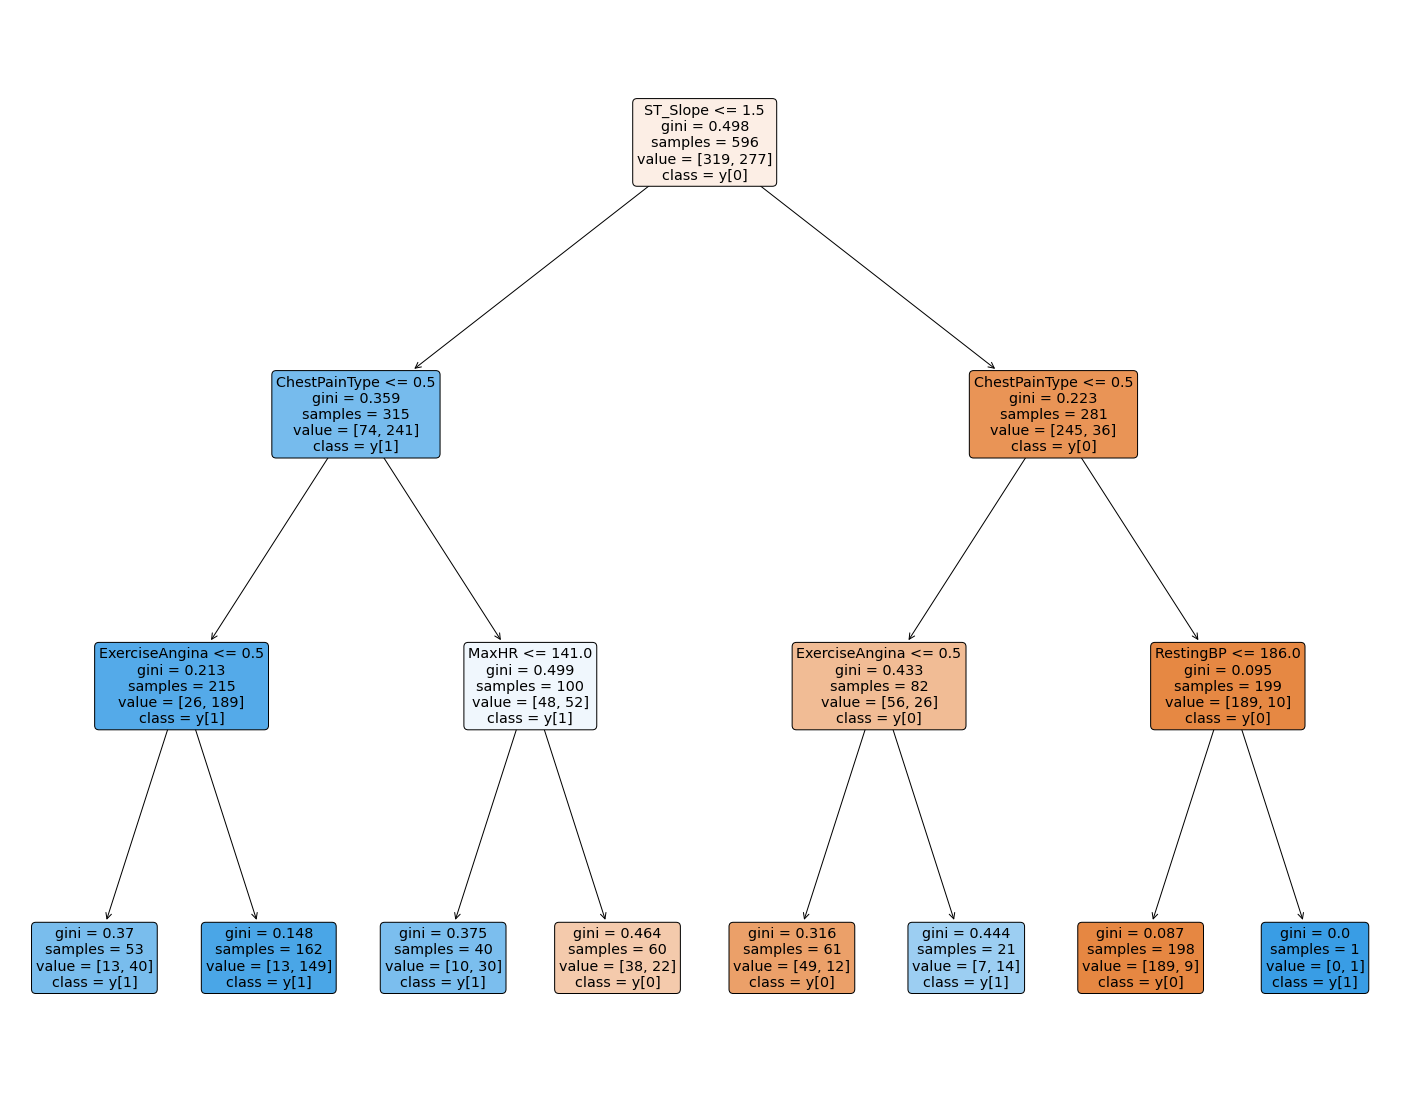

In [46]:
plt.figure(figsize=(25,20))
tree.plot_tree(clf_tree,
               feature_names=X.columns, class_names=True,
               filled=True, rounded=True,) 
plt.show()

### 3-2.. Random Forest
* label encoding 데이터 사용

In [49]:
X = df1.drop(columns='HeartDisease')
y = df1['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
param={"n_estimators" : [10, 100], 
       "max_depth":[2, 3, 4, 5, 6, 7, 8],
       "min_samples_leaf" : [8, 12, 18],
       "min_samples_split":range(2, 21) } 

method2 = RandomForestClassifier() 
gs = GridSearchCV(method2, param_grid=param, cv=3, n_jobs=-1) 

gs.fit(X, y)
result2 = gs.best_estimator_
print("train_score : {} ".format(result2.score(X_train, y_train))) 
print("test_score : {} ".format(result2.score(X_test, y_test))) 
print(gs.best_score_) 
print(gs.best_params_)

train_score : 0.8422818791946308 
test_score : 0.8933333333333333 
0.857812972319385
{'max_depth': 2, 'min_samples_leaf': 18, 'min_samples_split': 15, 'n_estimators': 10}


In [51]:
# fitting
# from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, oob_score=True,
                            criterion='entropy', max_depth=3, random_state = 1424)
rfc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=10,
                       oob_score=True, random_state=1424)

In [52]:
# predicted class
pred_y = rfc.predict(X_test)
pred_y

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

train accuracy: 0.8624161073825504
test accuracy: 0.9


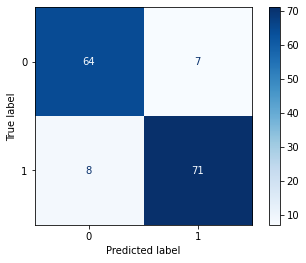

In [53]:
# accuracy score
train_acc = rfc.score(X_train,y_train)
test_acc = rfc.score(X_test,y_test)
print('train accuracy:', train_acc)
print('test accuracy:', test_acc)
plot_confusion_matrix(rfc, X_test, y_test, cmap = plt.cm.Blues, values_format = 'd')

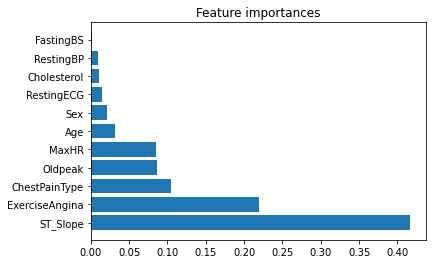

In [54]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# print("Feature ranking:")
# for f in range(X.shape[1]):
#     print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))
    
    
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices], align = 'center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.show()

### 3-3. Gradient Boost
* label encoding 데이터 사용

In [65]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import plot_confusion_matrix

In [47]:
method3 = GradientBoostingClassifier(random_state=42)

# n_estimators: tree 갯수, max_features: 
param= {'n_estimators': range(1, 500, 50), 
        'max_features': range(1, 10),
        'max_depth': range(3, 5), 
        'learning_rate': np.linspace(0.01, 0.1, 10)}

gs = GridSearchCV(method3, param_grid=param, cv=3, n_jobs=-1)

gs.fit(X, y)
result3 = gs.best_estimator_
print("train_score : {} ".format(result3.score(X_train, y_train))) 
print("test_score : {} ".format(result3.score(X_test, y_test))) 
print(gs.best_score_) 
print(gs.best_params_)

train_score : 0.9093959731543624 
test_score : 0.9466666666666667 
0.852490607591657
{'learning_rate': 0.04000000000000001, 'max_depth': 4, 'max_features': 1, 'n_estimators': 101}


In [55]:
gbm=GradientBoostingClassifier(max_depth = 4, n_estimators = 101, random_state = 1424)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=101, random_state=1424)

In [56]:
# predicted class
pred_y = gbm.predict(X_test)
pred_y

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

train accuracy: 0.9916107382550335
test accuracy: 0.8933333333333333


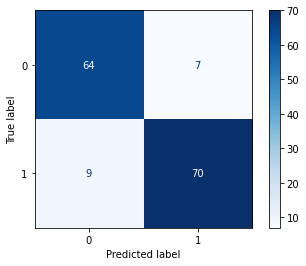

In [57]:
# accuracy score
train_acc = gbm.score(X_train,y_train)
test_acc = gbm.score(X_test,y_test)
print('train accuracy:', train_acc)
print('test accuracy:', test_acc)

plot_confusion_matrix(gbm, X_test, y_test, cmap = plt.cm.Blues, values_format = 'd')

### 3-4. KNN
* tree를 기반으로 한 모델이 아니므로 onehotencding을 적용한 데이터를 사용한다.
* 모든 변수를 포함한 모델과 중요한 변수 5개만 포함한 모델 비교

In [79]:
# from sklearn.neighbors import KNeighborsClassifier

In [58]:
X = df2.drop(columns='HeartDisease')
y = df2['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
params = {'n_neighbors' : list(range(1, 31)),
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'manhattan', 'minkowski']
         }
                        
method4 = KNeighborsClassifier()
gs = GridSearchCV(method4, param_grid=params, cv=3, n_jobs=-1)
gs.fit(X, y)

result4 = gs.best_estimator_
print("train_score : {} ".format(result4.score(X_train, y_train))) 
print("test_score : {} ".format(result4.score(X_test, y_test))) 
print(gs.best_score_) 
print(gs.best_params_)

#### * RF feature importance 참고.

In [60]:
# fitting(중요도 높은 변수 5개)
knn_clf = KNeighborsClassifier(n_neighbors = 15, n_jobs = -1, weights = 'distance', metric = 'manhattan')
knn_clf.fit(X_train[['ST_Slope_Up', 'ST_Slope_Flat', 'ST_Slope_Down', 'ExerciseAngina_Y', 'ExerciseAngina_N', 'ChestPainType_NAP', 'ChestPainType_ATA', 'ChestPainType_ASY', 'ChestPainType_TA', 'Oldpeak', 'Sex_M', 'Sex_F']], y_train)

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=15,
                     weights='distance')

In [61]:
# prediction
pred = knn_clf.predict(X_test[['ST_Slope_Up', 'ST_Slope_Flat', 'ST_Slope_Down', 'ExerciseAngina_Y', 'ExerciseAngina_N', 'ChestPainType_NAP', 'ChestPainType_ATA', 'ChestPainType_ASY', 'ChestPainType_TA', 'Oldpeak', 'Sex_M', 'Sex_F']])

train accuracy: 0.9177852348993288
test accuracy: 0.82


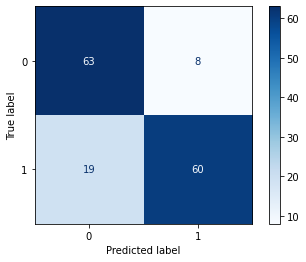

In [62]:
# accuracy
train_acc = knn_clf.score(X_train[['ST_Slope_Up', 'ST_Slope_Flat', 'ST_Slope_Down', 'ExerciseAngina_Y', 'ExerciseAngina_N', 'ChestPainType_NAP', 'ChestPainType_ATA', 'ChestPainType_ASY', 'ChestPainType_TA', 'Oldpeak', 'Sex_M', 'Sex_F']],
                          y_train)
test_acc = knn_clf.score(X_test[['ST_Slope_Up', 'ST_Slope_Flat', 'ST_Slope_Down', 'ExerciseAngina_Y', 'ExerciseAngina_N', 'ChestPainType_NAP', 'ChestPainType_ATA', 'ChestPainType_ASY', 'ChestPainType_TA', 'Oldpeak', 'Sex_M', 'Sex_F']],
                         y_test)
print('train accuracy:', train_acc)
print('test accuracy:', test_acc)

plot_confusion_matrix(knn_clf, X_test[['ST_Slope_Up', 'ST_Slope_Flat', 'ST_Slope_Down', 'ExerciseAngina_Y', 'ExerciseAngina_N', 'ChestPainType_NAP', 'ChestPainType_ATA', 'ChestPainType_ASY', 'ChestPainType_TA', 'Oldpeak', 'Sex_M', 'Sex_F']], y_test, cmap = plt.cm.Blues, values_format = 'd')

#### * 모든 변수 포함

In [64]:
# fitting(모든 변수)
knn_clf = KNeighborsClassifier(n_neighbors = 15, n_jobs = -1, weights = 'distance', metric = 'manhattan')
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=15,
                     weights='distance')

In [65]:
pred = knn_clf.predict(X_test)

train accuracy: 1.0
test accuracy: 0.7133333333333334


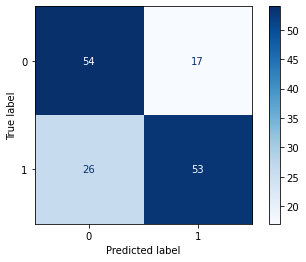

In [66]:
# accuracy
train_acc = knn_clf.score(X_train,y_train)
test_acc = knn_clf.score(X_test,y_test)
print('train accuracy:', train_acc)
print('test accuracy:', test_acc)

plot_confusion_matrix(knn_clf, X_test, y_test, cmap = plt.cm.Blues, values_format = 'd')

# 4. logistic reg
* 범주형 변수 하나마다 Decision Tree를 그리고(depth=1 or 2), leaf node마다 logistic regression을 적용한다.
* 로지스틱 할 때는 변수 1개 or 2개씩만 넣어서 적용하기

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm

### 4-1. RF로 사후확률 구하기

In [68]:
X = df1.drop(columns='HeartDisease')
y = df1['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
post_prob = rfc.predict_proba(X_train)
post_prob

array([[0.37048   , 0.62952   ],
       [0.94816751, 0.05183249],
       [0.60896293, 0.39103707],
       ...,
       [0.85768071, 0.14231929],
       [0.1722819 , 0.8277181 ],
       [0.32503847, 0.67496153]])

In [70]:
len(post_prob)

596

In [71]:
y_prob = []

for i in range(0, len(post_prob)):
    y_prob.append(round(post_prob[i][1], 4))

### 4-2. 사후확률을 y로 두고 regression tree 그리기(depth=1)

In [72]:
# fit regression model
reg_tree = DecisionTreeRegressor(max_depth=1)
reg_tree.fit(X_train, y_prob)

DecisionTreeRegressor(max_depth=1)

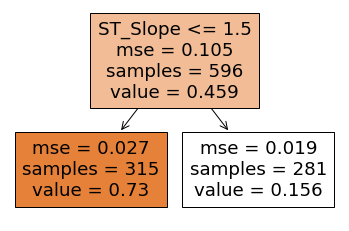

In [73]:
# plot tree
features = X.columns.tolist()
tree.plot_tree(reg_tree, feature_names=features, filled=True)
plt.show()

* RF의 feature importance에서 제일 중요한 변수인 ST_Slope로 루트 노드를 선정했다.

### 4-3. 리프 노드에 Logistic Regression 수행하기

####  4-3-1. left data(st_slope <= 1.5)

In [74]:
# 'st_slope <= 1.5 '는 'down + flat' (Down = 0, Flat = 1, Up = 2)
left_data = X_train.loc[X_train['ST_Slope']<=1.5, ]
right_data = X_train.loc[X_train['ST_Slope']>1.5, ]

In [75]:
# reg-tree의 조건에 만족하는 y_train가져오기
y0 = []
y1 = []

for i in y_train.index:
    if i in left_data.index:
        y1.append(y_train[i])
    elif i in right_data.index:
        y0.append(y_train[i])

In [76]:
# X_데이터에 y변수 붙이기
# y1 = pd.DataFrame(y1, columns = ['y'])
left_data['y'] = y1

C:\Users\Dain\AppData\Local\Temp/ipykernel_14104/3536397205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_data['y'] = y1


In [77]:
num_col = df.drop(columns=['HeartDisease', 'FastingBS']).select_dtypes(include=['int', 'float']).columns.tolist()
num_col

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

#### * one-reg

In [78]:
logistic_reg = sm.Logit.from_formula("y ~ Age", left_data)
result = logistic_reg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.541284
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  315
Model:                          Logit   Df Residuals:                      313
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 May 2022   Pseudo R-squ.:                0.007098
Time:                        16:23:00   Log-Likelihood:                -170.50
converged:                       True   LL-Null:                       -171.72
Covariance Type:            nonrobust   LLR p-value:                    0.1184
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0999      0.825     -0.121      0.904      -1.717       1.517
Age            0.0233      0.

In [79]:
logi = LogisticRegression()
result = logi.fit(np.array(left_data['Age']).reshape(-1,1), left_data['y'])

In [80]:
a = list(df['Age'])
a.sort()

In [81]:
pp = logi.predict_proba(np.array(a).reshape(-1,1))

In [82]:
p = []

for i in range(0, len(pp)):
    p.append(round(pp[i][1], 4))

Text(0, 0.5, 'Homogenity')

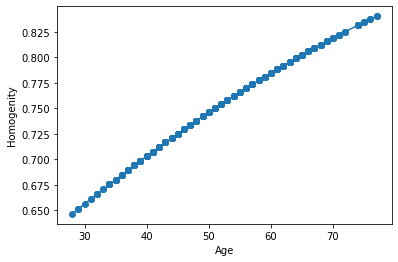

In [83]:
# y=1인 데이터에 대해 age변수를 독립변수로한 로지스틱 수행 후 사후확률 그래프 
plt.plot(a, p, '-o')
plt.xlabel('Age')
plt.ylabel('Homogenity')

In [84]:
logistic_reg = sm.Logit.from_formula("y ~ RestingBP", 
                                     left_data)
result = logistic_reg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.524427
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  315
Model:                          Logit   Df Residuals:                      313
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 May 2022   Pseudo R-squ.:                 0.03802
Time:                        16:23:04   Log-Likelihood:                -165.19
converged:                       True   LL-Null:                       -171.72
Covariance Type:            nonrobust   LLR p-value:                 0.0003020
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7281      1.136     -2.401      0.016      -4.955      -0.501
RestingBP      0.0294      0.

In [85]:
logistic_reg = sm.Logit.from_formula("y ~ Cholesterol", 
                                     left_data)
result = logistic_reg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.545154
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  315
Model:                          Logit   Df Residuals:                      313
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 May 2022   Pseudo R-squ.:               6.281e-07
Time:                        16:23:05   Log-Likelihood:                -171.72
converged:                       True   LL-Null:                       -171.72
Covariance Type:            nonrobust   LLR p-value:                    0.9883
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1884      0.538      2.209      0.027       0.134       2.243
Cholesterol -3.066e-05    

In [86]:
logistic_reg = sm.Logit.from_formula("y ~ MaxHR", 
                                     left_data)
result = logistic_reg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.487271
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  315
Model:                          Logit   Df Residuals:                      313
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 May 2022   Pseudo R-squ.:                  0.1062
Time:                        16:23:06   Log-Likelihood:                -153.49
converged:                       True   LL-Null:                       -171.72
Covariance Type:            nonrobust   LLR p-value:                 1.554e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3999      0.982      6.517      0.000       4.475       8.325
MaxHR         -0.0385      0.

In [87]:
logi = LogisticRegression()
result = logi.fit(np.array(left_data['MaxHR']).reshape(-1,1), left_data['y'])

In [88]:
a = list(df['MaxHR'])
a.sort()

In [89]:
pp = logi.predict_proba(np.array(a).reshape(-1,1))

In [90]:
p = []

for i in range(0, len(pp)):
    p.append(round(pp[i][1], 4))

Text(0, 0.5, 'Homogenity')

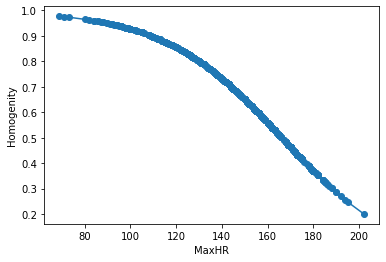

In [91]:
# y=1인 데이터에 대해 MaxHR변수를 독립변수로한 로지스틱 수행 후 사후확률 그래프 
plt.plot(a, p, '-o')
plt.xlabel('MaxHR')
plt.ylabel('Homogenity')

In [92]:
logistic_reg = sm.Logit.from_formula("y ~ Oldpeak", 
                                     left_data)
result = logistic_reg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.529861
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  315
Model:                          Logit   Df Residuals:                      313
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 May 2022   Pseudo R-squ.:                 0.02805
Time:                        16:23:10   Log-Likelihood:                -166.91
converged:                       True   LL-Null:                       -171.72
Covariance Type:            nonrobust   LLR p-value:                  0.001909
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6162      0.220      2.798      0.005       0.185       1.048
Oldpeak        0.4168      0.

In [93]:
logi = LogisticRegression()
result = logi.fit(np.array(left_data['Oldpeak']).reshape(-1,1), left_data['y'])

In [94]:
a = list(df['Oldpeak'])
a.sort()

In [95]:
pp = logi.predict_proba(np.array(a).reshape(-1,1))
p = []

for i in range(0, len(pp)):
    p.append(round(pp[i][1], 4))

Text(0, 0.5, 'Homogenity')

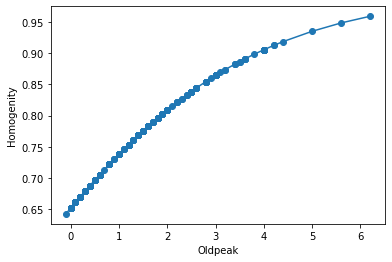

In [96]:
plt.plot(a, p, '-o')
plt.xlabel('Oldpeak')
plt.ylabel('Homogenity')

#### * two reg

In [97]:
logistic_reg = sm.Logit.from_formula("y ~ MaxHR + Oldpeak", 
                                     left_data)
result = logistic_reg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.477328
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  315
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            2
Date:                Sat, 21 May 2022   Pseudo R-squ.:                  0.1244
Time:                        16:23:13   Log-Likelihood:                -150.36
converged:                       True   LL-Null:                       -171.72
Covariance Type:            nonrobust   LLR p-value:                 5.263e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7139      1.009      5.660      0.000       3.735       7.692
MaxHR         -0.0370      0.

#### 4-3-2. right data(st_slope > 1.5)

In [98]:
right_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
164,52,0,1,140,225,0,1,140,0,0.0,2
265,54,1,1,160,305,0,1,175,0,0.0,2
639,54,0,1,132,288,1,0,159,1,0.0,2
28,53,0,1,113,468,0,1,127,0,0.0,2
765,41,1,2,112,250,0,1,179,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
121,52,0,2,125,272,0,1,139,0,0.0,2
20,43,0,3,100,223,0,1,142,0,0.0,2
71,44,1,1,130,215,0,1,135,0,0.0,2
106,48,0,0,120,254,0,2,110,0,0.0,2


In [99]:
right_data['y'] = y0

C:\Users\Dain\AppData\Local\Temp/ipykernel_14104/1036394420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  right_data['y'] = y0


#### * one reg

In [100]:
logistic_reg = sm.Logit.from_formula("y ~ Age", right_data)
result = logistic_reg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.347311
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  281
Model:                          Logit   Df Residuals:                      279
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 May 2022   Pseudo R-squ.:                 0.09267
Time:                        16:23:16   Log-Likelihood:                -97.594
converged:                       True   LL-Null:                       -107.56
Covariance Type:            nonrobust   LLR p-value:                 8.005e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.7150      1.214     -5.533      0.000      -9.094      -4.336
Age            0.0910      0.

In [101]:
logi = LogisticRegression()
result = logi.fit(np.array(right_data['Age']).reshape(-1,1), right_data['y'])

In [102]:
a = list(df['Age'])
a.sort()

In [103]:
pp = logi.predict_proba(np.array(a).reshape(-1,1))
p = []

for i in range(0, len(pp)):
    p.append(round(pp[i][1], 4))

Text(0, 0.5, 'Homogeneity')

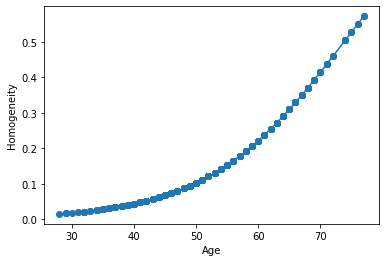

In [104]:
plt.plot(a, p, '-o')
plt.xlabel('Age')
plt.ylabel('Homogeneity')

In [105]:
logistic_reg = sm.Logit.from_formula("y ~ MaxHR", 
                                     right_data)
result = logistic_reg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.381213
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  281
Model:                          Logit   Df Residuals:                      279
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 May 2022   Pseudo R-squ.:                0.004109
Time:                        16:23:20   Log-Likelihood:                -107.12
converged:                       True   LL-Null:                       -107.56
Covariance Type:            nonrobust   LLR p-value:                    0.3471
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1144      1.314     -2.369      0.018      -5.691      -0.538
MaxHR          0.0079      0.

In [106]:
logi = LogisticRegression()
result = logi.fit(np.array(right_data['MaxHR']).reshape(-1,1), right_data['y'])

In [107]:
a = list(df['MaxHR'])
a.sort()

In [108]:
pp = logi.predict_proba(np.array(a).reshape(-1,1))
p = []

for i in range(0, len(pp)):
    p.append(round(pp[i][1], 4))

Text(0, 0.5, 'Homogenity')

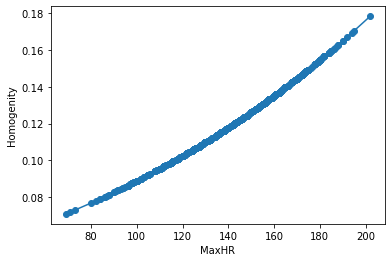

In [110]:
plt.plot(a, p, '-o')
plt.xlabel('MaxHR')
plt.ylabel('Homogenity')

In [111]:
logistic_reg = sm.Logit.from_formula("y ~ Oldpeak", 
                                     right_data)
result = logistic_reg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.360165
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  281
Model:                          Logit   Df Residuals:                      279
Method:                           MLE   Df Model:                            1
Date:                Sat, 21 May 2022   Pseudo R-squ.:                 0.05909
Time:                        16:23:30   Log-Likelihood:                -101.21
converged:                       True   LL-Null:                       -107.56
Covariance Type:            nonrobust   LLR p-value:                 0.0003632
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2511      0.218    -10.345      0.000      -2.678      -1.825
Oldpeak        0.8754      0.

In [112]:
logi = LogisticRegression()
result = logi.fit(np.array(right_data['Oldpeak']).reshape(-1,1), right_data['y'])

In [113]:
a = list(df['Oldpeak'])
a.sort()

In [114]:
pp = logi.predict_proba(np.array(a).reshape(-1,1))
p = []

for i in range(0, len(pp)):
    p.append(round(pp[i][1], 4))

Text(0, 0.5, 'Homogenity')

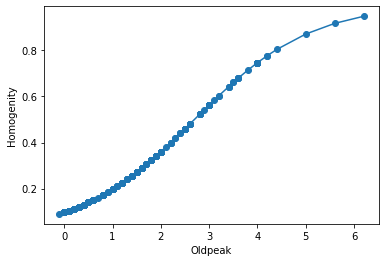

In [115]:
plt.plot(a, p, '-o')
plt.xlabel('Oldpeak')
plt.ylabel('Homogenity')

#### * two reg

In [116]:
logistic_reg = sm.Logit.from_formula("y ~ MaxHR + Oldpeak", 
                                     right_data)
result = logistic_reg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.358933
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  281
Model:                          Logit   Df Residuals:                      278
Method:                           MLE   Df Model:                            2
Date:                Sat, 21 May 2022   Pseudo R-squ.:                 0.06231
Time:                        16:23:33   Log-Likelihood:                -100.86
converged:                       True   LL-Null:                       -107.56
Covariance Type:            nonrobust   LLR p-value:                  0.001228
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3751      1.397     -2.415      0.016      -6.114      -0.636
MaxHR          0.0074      0.

### 5. 결론
* RF로 사후확률을 구해서 목표변수 대신 사용해 regression tree를 구하면, 모델이 자동으로 feature importance가 높은 변수를 루트 노드로 선정한다.
* feature importance에서 수치형 변수만 봤을 때, maxHR > age 순서로 중요했고, 로지스틱 결과 역시 maxHR, age 순서로 R-squared 값이 높았다.
* maxHR과 age에 대해서만 logistic regression의 사후확률 그래프를 그려봤는데, scatter plot에서 봤던 결과와 같은 결과가 나왔다.
* scatter plot에서 maxHR은 낮을수록 심장질환이 있는 것으로 나타났고, 사후확률 그래프 역시 maxHR이 낮을수록 높은 확률을 갖는 것으로 나타났다. (사후확률 그래프의 확률은 y=1인 확률로 그린 그래프이다.)
* age도 마찬가지로 scatter plot에서 주로 나이가 많은 쪽에서 심장질환이 있는 것으로 나타났고, 사후확률 그래프에서 나이가 많을수록 높은 사후확률이 나타났다.